In [1]:
%reset

In [13]:
import sympy
from sympy import symbols, pi, cos, sin
from sympy.physics.mechanics import ReferenceFrame, dynamicsymbols, Particle, Point
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [4]:
q1, q2, q3 = dynamicsymbols('q1 q2 q3')
N = ReferenceFrame('N')
A = N.orientnew('A','Axis',(N.y,q1))
B = A.orientnew('B', 'Body', (q2, q1, q3), 'XYZ')
# Definir los símbolos
L = symbols('L')
x1, y1, z1 = symbols('x1 y1 z1')
x2, y2, z2 = symbols('x2 y2 z2')
k = symbols('k')

O = Point('O')
vector1 = x1 * N.x + y1 * N.y + z1 * N.z
vector2 = x2 * N.x + y2 * N.y + z2 * N.z
B.dcm(N)

# r1 = L*N.y
# r2 = L*B.y

# r = r1 + r2


# r.express(N).subs({q1:0,q2:np.deg2rad(45)})

Matrix([
[(-sin(q1(t))*cos(q2(t))*cos(q3(t)) + sin(q2(t))*sin(q3(t)))*sin(q1(t)) + cos(q1(t))**2*cos(q3(t)),  sin(q1(t))*sin(q2(t))*cos(q3(t)) + sin(q3(t))*cos(q2(t)), (-sin(q1(t))*cos(q2(t))*cos(q3(t)) + sin(q2(t))*sin(q3(t)))*cos(q1(t)) - sin(q1(t))*cos(q1(t))*cos(q3(t))],
[ (sin(q1(t))*sin(q3(t))*cos(q2(t)) + sin(q2(t))*cos(q3(t)))*sin(q1(t)) - sin(q3(t))*cos(q1(t))**2, -sin(q1(t))*sin(q2(t))*sin(q3(t)) + cos(q2(t))*cos(q3(t)),  (sin(q1(t))*sin(q3(t))*cos(q2(t)) + sin(q2(t))*cos(q3(t)))*cos(q1(t)) + sin(q1(t))*sin(q3(t))*cos(q1(t))],
[                                         sin(q1(t))*cos(q1(t))*cos(q2(t)) + sin(q1(t))*cos(q1(t)),                                    -sin(q2(t))*cos(q1(t)),                                                                 -sin(q1(t))**2 + cos(q1(t))**2*cos(q2(t))]])

In [5]:
from sympy import symbols
from sympy.physics.mechanics import dynamicsymbols, ReferenceFrame, Point

q1, q2, q3 = dynamicsymbols('q1 q2 q3')

delta_x = symbols('delta_x')
k = symbols('k')

N = ReferenceFrame('N')

A = N.orientnew('A', 'Axis', (q1, N.y))
B = A.orientnew('B', 'Body', (q2, q1, q3), 'XYZ')

d_A, d_B = symbols('d_A d_B')
L = d_A + d_B

O = Point('O')

vector_OA = d_A * N.y
vector_AB = d_B * A.y 

A_point = O.locatenew('A_point', vector_OA)
B_point = A_point.locatenew('B_point', vector_AB)

coords_B = B_point.pos_from(O).express(N)

vector1 = coords_B + delta_x * N.x


In [16]:
class Seccion:
    def __init__(self, N_prev, O_prev, q1_val, q2_val, q3_val, d_A_val, d_B_val, delta_x_val, name_suffix):
        self.q1, self.q2, self.q3 = dynamicsymbols(f'q1_{name_suffix} q2_{name_suffix} q3_{name_suffix}')
        self.d_A, self.d_B, self.delta_x = symbols(f'd_A_{name_suffix} d_B_{name_suffix} delta_x_{name_suffix}')

        self.valores = {
            self.q1: q1_val,
            self.q2: q2_val,
            self.q3: q3_val,
            self.d_A: d_A_val,
            self.d_B: d_B_val,
            self.delta_x: delta_x_val
        }
        
        self.angle = 2 * pi / 3
        self.angle2 = 4 * pi / 3

        self.N = N_prev
        self.O = O_prev
        
        self.A = self.N.orientnew(f'A_{name_suffix}', 'Axis', (self.q1, self.N.y))
        self.B = self.A.orientnew(f'B_{name_suffix}', 'Body', (self.q2, self.q1, self.q3), 'XYZ')
        
        self.U = B.x
        self.W = B.z

        self.vector_OA = self.d_A * self.N.y
        self.vector_AB = self.d_B * self.A.y
        self.A_point = self.O.locatenew(f'A_point_{name_suffix}', self.vector_OA)
        self.B_point = self.A_point.locatenew(f'B_point_{name_suffix}', self.vector_AB)
        self.coords_B = self.B_point.pos_from(self.O).express(self.N)
        
        self.vector1 = self.coords_B + self.delta_x * self.B.x
        self.vector1 = self.vector1.express(self.N)
        
        self.vector2 = self.coords_B + self.delta_x * (B.x * cos(self.angle) + B.z * sin(self.angle))
        self.vector3 = self.coords_B + self.delta_x * (B.x * cos(self.angle2) + B.z * sin(self.angle2))

        self.vector_r1 = self.delta_x * self.N.x
        self.vector_r2 = self.delta_x * (N.x * cos(self.angle) + N.z * sin(self.angle))
        self.vector_r3 = self.delta_x * (N.x * cos(self.angle2) + N.z * sin(self.angle2))


    def actualizar_valores(self, valores):
        self.vector_OA = self.vector_OA.subs(valores)
        self.vector_AB = self.vector_AB.subs(valores)
        self.coords_B = self.coords_B.subs(valores)
        self.vector1 = self.vector1.subs(valores)
        return self.vector1
    
    def encontrar_exten(self):
        self.vectork1 = self.vector1 - self.vector_r1
        self.vectork2 = self.vector2 - self.vector_r2
        self.vectork3 = self.vector3 - self.vector_r3
        pass


N_inicial = ReferenceFrame('N')
O_inicial = Point('O')

parametros = [
    (10, 20, 30, 1, 1, 0.5),  # (q1, q2, q3, d_A, d_B, delta_x) d_A + d_B = L
    (15, 25, 35, 1, 1, 0.5),
]

secciones = []

for i, (q1_val, q2_val, q3_val, d_A_val, d_B_val, delta_x_val) in enumerate(parametros):
    seccion = Seccion(N_inicial if i == 0 else secciones[-1].B, O_inicial if i == 0 else secciones[-1].B_point, q1_val, q2_val, q3_val, d_A_val, d_B_val, delta_x_val, name_suffix=str(i))
    vector1_actualizado = seccion.actualizar_valores(seccion.valores)
    print(f'Sección {i}: Vector1 = {vector1_actualizado}')
    secciones.append(seccion)


Sección 0: Vector1 = (0.5*cos(10)**2*cos(30) + 0.5*(sin(20)*sin(30) - sin(10)*cos(20)*cos(30))*sin(10))*N.x + (0.5*sin(30)*cos(20) + 0.5*sin(10)*sin(20)*cos(30) + 2)*N.y + (-0.5*sin(10)*cos(10)*cos(30) + 0.5*(sin(20)*sin(30) - sin(10)*cos(20)*cos(30))*cos(10))*N.z
Sección 1: Vector1 = (0.5*cos(15)**2*cos(35) + 0.5*(sin(25)*sin(35) - sin(15)*cos(25)*cos(35))*sin(15))*B_0.x + (0.5*sin(35)*cos(25) + 0.5*sin(15)*sin(25)*cos(35) + 2)*B_0.y + (0.5*(sin(25)*sin(35) - sin(15)*cos(25)*cos(35))*cos(15) - 0.5*sin(15)*cos(15)*cos(35))*B_0.z


In [20]:
vector1_actualizado.evalf()

- 0.0529526892904926*B_0.x + 1.82668098518876*B_0.y - 0.466000570602402*B_0.z

In [17]:
def representar_seccion(seccion):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    O = [0, 0, 0]

    N_x = [1, 0, 0]
    N_y = [0, 1, 0]
    N_z = [0, 0, 1]

    ax.quiver(*O, *N_x, color='r', length=1, normalize=True)
    ax.quiver(*O, *N_y, color='g', length=1, normalize=True)
    ax.quiver(*O, *N_z, color='b', length=1, normalize=True)

    vector1_val = np.array([seccion.vector1.dot(seccion.N.x), seccion.vector1.dot(seccion.N.y), seccion.vector1.dot(seccion.N.z)]).astype(np.float64)
    ax.quiver(*O, *vector1_val, color='k', length=1, normalize=False)

    ax.set_xlim([-2, 2])
    ax.set_ylim([-2, 2])
    ax.set_zlim([-2, 2])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    plt.show()


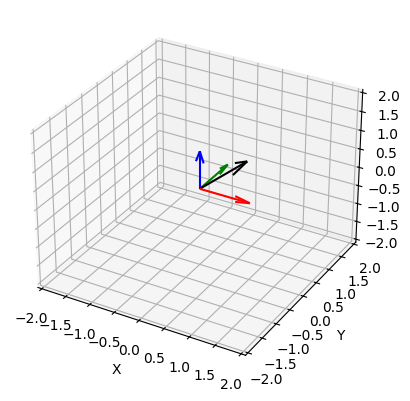

In [18]:
seccion_ejemplo = secciones[1] 

valores = {
    seccion_ejemplo.q1: np.deg2rad(10),
    seccion_ejemplo.q2: np.deg2rad(20),
    seccion_ejemplo.q3: np.deg2rad(30),
    seccion_ejemplo.d_A: 1,
    seccion_ejemplo.d_B: 1,
    seccion_ejemplo.delta_x: 0.5
}
seccion_ejemplo.actualizar_valores(valores)

representar_seccion(seccion_ejemplo)